In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Crypto/test_2/FTX/FTT-USD.csv', date_parser = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,1.501756,1.517845,1.460168,1.473047,1.473047,8396595
1,2019-12-01,1.473410,1.480934,1.425907,1.476954,1.476954,9944409
2,2019-12-02,1.476461,1.512531,1.448838,1.492000,1.492000,9514150
3,2019-12-03,1.492000,1.583356,1.492000,1.550795,1.550795,7624523
4,2019-12-04,1.550717,1.819642,1.526406,1.800696,1.800696,11150378
...,...,...,...,...,...,...,...
1092,2022-11-26,1.401195,1.429898,1.349244,1.364939,1.364939,43773375
1093,2022-11-27,1.364506,1.384601,1.315469,1.315469,1.315469,7301184
1094,2022-11-28,1.315751,1.329345,1.281961,1.295093,1.295093,6250102
1095,2022-11-29,1.294036,1.322258,1.278124,1.303769,1.303769,4903379


# **Data Pre-processing**

In [ ]:
#Replace None or Null values with forward filling technique using fillna function.

data = data.fillna(method = 'ffill')

In [ ]:
#Convert Date column into Datatime format

data['Date'] = pd.to_datetime(data.Date)

# **Data Visualization**

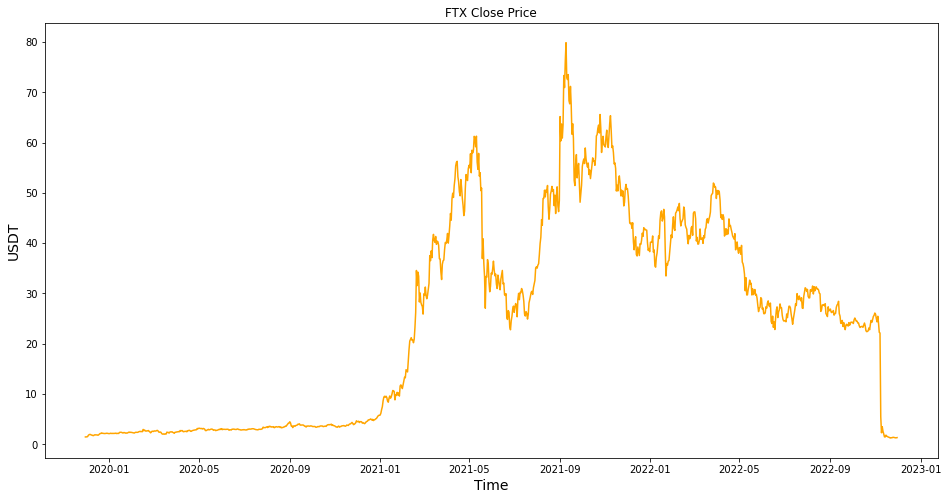

In [ ]:
# Visualize the close price history
plt.figure(figsize=(16, 8))
plt.plot(data['Date'], data['Close'], color="orange")
plt.title('FTX Close Price')
plt.xlabel("Time", fontsize=14,)
plt.ylabel("USDT", fontsize=14)
plt.show()

# **Data Spliting**

In [ ]:
data_training = data.copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,1.501756,1.517845,1.460168,1.473047,1.473047,8396595
1,2019-12-01,1.473410,1.480934,1.425907,1.476954,1.476954,9944409
2,2019-12-02,1.476461,1.512531,1.448838,1.492000,1.492000,9514150
3,2019-12-03,1.492000,1.583356,1.492000,1.550795,1.550795,7624523
4,2019-12-04,1.550717,1.819642,1.526406,1.800696,1.800696,11150378
...,...,...,...,...,...,...,...
846,2022-03-25,49.452240,51.429714,49.163292,49.750996,49.750996,238255458
847,2022-03-26,49.749378,50.541172,49.575539,49.919537,49.919537,94919252
848,2022-03-27,49.924557,52.203789,49.644836,51.962048,51.962048,124360636
849,2022-03-28,51.964310,53.192760,51.579144,51.725754,51.725754,159643415


In [ ]:
# data_test = data[data['Date']> '2022-03-30'].copy()
# data_test

,Date,Open,High,Low,Close,Adj Close,Volume
852,2022-03-31,51.163799,51.691452,48.706467,48.885368,48.885368,158985625
853,2022-04-01,48.897396,51.130981,47.588886,50.493214,50.493214,161010469
854,2022-04-02,50.490658,51.185368,49.630230,49.728485,49.728485,145408272
855,2022-04-03,49.723057,51.231583,49.434307,50.456226,50.456226,100486929
856,2022-04-04,50.446308,50.446308,48.914635,50.132381,50.132381,119579446
...,...,...,...,...,...,...,...
1092,2022-11-26,1.401195,1.429898,1.349244,1.364939,1.364939,43773375
1093,2022-11-27,1.364506,1.384601,1.315469,1.315469,1.315469,7301184
1094,2022-11-28,1.315751,1.329345,1.281961,1.295093,1.295093,6250102
1095,2022-11-29,1.294036,1.322258,1.278124,1.303769,1.303769,4903379


# **Feature Engineering**

In [ ]:
#feature selection
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,1.501756,1.517845,1.460168,1.473047,8396595
1,1.473410,1.480934,1.425907,1.476954,9944409
2,1.476461,1.512531,1.448838,1.492000,9514150
3,1.492000,1.583356,1.492000,1.550795,7624523
4,1.550717,1.819642,1.526406,1.800696,11150378


In [ ]:
#Normalizing training_data
scaler=MinMaxScaler()
training_data = scaler.fit_transform(training_data)
print(training_data.shape)

(851, 5)


In [ ]:
# we keep the training set as 70% and 30% testing set

training_size=int(len(training_data)*0.70)
test_size=len(training_data)-training_size
train_data,test_data=training_data[0:training_size],training_data[training_size:len(training_data)]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (595, 5)
test_data:  (256, 5)


In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (564, 30)
y_train:  (564,)
X_test:  (225, 30)
y_test (225,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (564, 30, 1)
X_test:  (225, 30, 1)


# Model Building

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape=(None,1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 128)         66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test,y_test),
                    epochs=50,
                    batch_size=32,
                    verbose=1)

Epoch 1/50
18/18 [==============================] - 7s 131ms/step - loss: 0.0141 - val_loss: 0.0108
Epoch 2/50
18/18 [==============================] - 1s 72ms/step - loss: 0.0021 - val_loss: 0.0047
Epoch 3/50
18/18 [==============================] - 1s 71ms/step - loss: 0.0016 - val_loss: 0.0060
Epoch 4/50
18/18 [==============================] - 1s 72ms/step - loss: 0.0018 - val_loss: 0.0082
Epoch 5/50
18/18 [==============================] - 1s 72ms/step - loss: 0.0017 - val_loss: 0.0042
Epoch 6/50
18/18 [==============================] - 1s 71ms/step - loss: 0.0013 - val_loss: 0.0038
Epoch 7/50
18/18 [==============================] - 1s 72ms/step - loss: 0.0017 - val_loss: 0.0066
Epoch 8/50
18/18 [==============================] - 1s 72ms/step - loss: 0.0011 - val_loss: 0.0031
Epoch 9/50
18/18 [==============================] - 1s 72ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 10/50
18/18 [==============================] - 1s 72ms/step - loss: 8.9752e-04 - val_loss: 0.0038
Epoc

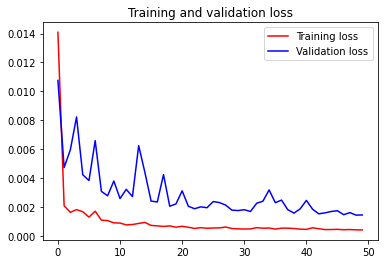

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

# **Performance Evaluation**

In [ ]:
# prediction and check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

print("train_predict: ", train_predict.shape)
print("test_predict: ", test_predict.shape)

8/8 [==============================] - 0s 21ms/step
train_predict:  (564, 1)
test_predict:  (225, 1)


In [ ]:
# Transform back to original form

# train_predict = scaler.inverse_transform(train_predict)
# test_predict = scaler.inverse_transform(test_predict)
# original_ytrain = scaler.inverse_transform(y_train) 
# original_ytest = scaler.inverse_transform(y_test)

In [ ]:
# Evaluation metrices RMSE, MSE and MAE for train data
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,train_predict)))
print("Train data MSE: ", mean_squared_error(y_train,train_predict))
print("Train data MAE: ", mean_absolute_error(y_train,train_predict))
print("Train data R2 score:", r2_score(y_train, train_predict))


Train data RMSE:  0.02018778229600503
Train data MSE:  0.0004075465540308942
Train data MAE:  0.011643789706036113
Train data R2 score: 0.9906827110834854


In [ ]:
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))
print("Test data R2 score:", r2_score(y_test, test_predict))

Test data RMSE:  0.037981658404890366
Test data MSE:  0.001442606375185779
Test data MAE:  0.027882429498928364
Test data R2 score: 0.8973869514097436


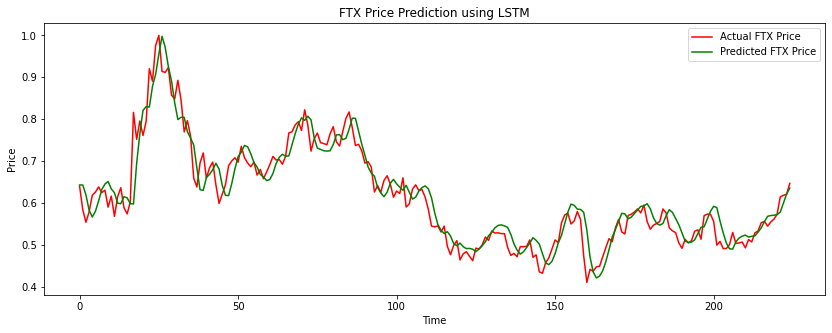

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Actual FTX Price')
plt.plot(test_predict, color = 'green', label = 'Predicted FTX Price')
plt.title('FTX Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()